# Introduction à Python pour Data Science et ML

Ceci suppose que vous avez déjà fait un tutoriel sur les principes de base de la langue.  Nous allons parler ici de `pandas`.

Les données ne servent à rien si on ne peut pas les lire.  Heureusement, on a déjà pensé à ça.  Nous allons regarder les modules `cvs` et puis `pandas`. 

Le [tutoriel [en] de Greg Reda](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) en trois parties est également superbe et accompagné d'une vidéo (de Greg, sans désastre maritime).

In [4]:
import matplotlib

%matplotlib inline

# Learning from Disaster

Source:  [Kaggle competition](https://www.kaggle.com/c/titanic/) on surviving the wreck of the Titanic.


In [5]:
"""
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
"""
True

True

In [7]:
# The first thing to do is to import the relevant packages
# that I will need for my script, 
# these include the Numpy (for maths and arrays)
# and csv for reading and writing csv files
# If i want to use something from this I need to call 
# csv.[function] or np.[function] first

import csv as csv 
import numpy as np

# Open up the csv file in to a Python object
data_all = []
with open('train.csv') as train_file:
    csv_reader = csv.reader(train_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        data_all.append(row)
data_all = np.array(data_all)
data = data_all[1::]

test_all = []
with open('test.csv') as test_file:
    csv_reader = csv.reader(test_file, delimiter=',', quotechar='"')
    for row in csv_reader:
        test_all.append(row)
test_all = np.array(test_all)
test = test_all[1::]

Exercice :
* Regardez les trois dernier rangs.
* Il y a combien de rangs?  Combien de colonnes?


Mais même les chiffres sont des strings.
* Il faut parfois convertir en float.
* Quelques fonctions nous rendent des matrices de True/False que nous pouvons alors utiliser pour sélectionner d'autres élements.

In [8]:
# The size() function counts how many elements are in
# in the array and sum() (as you would expects) sums up
# the elements in the array.

number_passengers = np.size(data[0::,1].astype(np.float))
number_survived = np.sum(data[0::,1].astype(np.float))
proportion_survivors = number_survived / number_passengers

women_only_stats = data[0::,4] == "female" # This finds where all 
                                           # the elements in the gender
                                           # column that equals “female”
men_only_stats = data[0::,4] != "female"   # This finds where all the 
                                           # elements do not equal 
                                           # female (i.e. male)

# Using the index from above we select the females and males separately
women_onboard = data[women_only_stats,1].astype(np.float)     
men_onboard = data[men_only_stats,1].astype(np.float)

# Then we finds the proportions of them that survived
proportion_women_survived = \
                       np.sum(women_onboard) / np.size(women_onboard)  
proportion_men_survived = \
                       np.sum(men_onboard) / np.size(men_onboard) 

# and then print it out
print('Proportion of women who survived is {p:.2f}'.format(
        p=proportion_women_survived))
print('Proportion of men who survived is {p:.2f}'.format(
        p=proportion_men_survived))

Proportion of women who survived is 0.74
Proportion of men who survived is 0.19


# Vers pandas

Ça marche quand tout est propre et net, mais la vie ne l'est pas toujours.  Par exemple, qu'est-ce qui ne va pas ici?

In [9]:
data[0::,5].astype(np.float)

ValueError: could not convert string to float: 

# Pandas

* Regardez `df`.  Quelles sont les données dedans?  Quelles sont ses méthodes?
* Regardez `df.head()`, `df.types`, `df.info()`, `df.describe()`
* Regardez `df['Age'][0:10]` et `df.Age[0:10]`, `type(df.Age)`

In [10]:
import pandas as pd

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('train.csv', header=0)

## Series

* `df.Age.mean()`
* `df[['Sex', 'Pclass', 'Age']]`
* `df[df['Age'] > 60]`
* `df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]`
* `df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]`

In [11]:
for i in range(1,4):
    print(i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ]))

(1, 122)
(2, 108)
(3, 347)


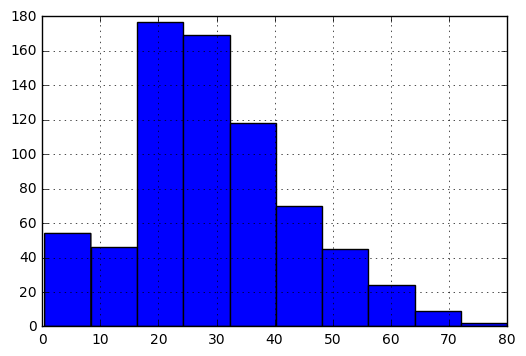

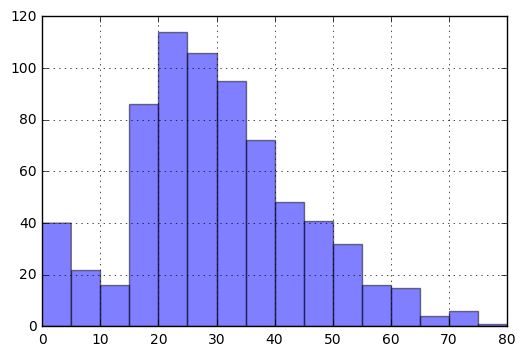

In [12]:
import pylab as P
df['Age'].hist()
P.show()

df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

# Nettoyage des données

C'est ici qu'on passe énormément de temps...

In [13]:
# Ajouter une colonne :
df['Gender'] = 4

# Peut-être avec des valeurs plus intéressantes :
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

# Ou binaire :
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

Il y a des passagers pour qui nous ne savons pas l'age.  Et pourtant nos modèles en auront besoin.  Nous pourrions (comme première essaie) remplir l'age avec la moyenne, mais nous avons vu que la distribution n'est pas idéal pour une telle supposition.  Essayons avec le médian par sex et par classe :

In [14]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & \
                              (df['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [15]:
# On commence avec une copie :
df['AgeFill'] = df['Age']

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,NaN
17,1,2,NaN,NaN
19,0,3,NaN,NaN
26,1,3,NaN,NaN
28,0,3,NaN,NaN
29,1,3,NaN,NaN
31,0,1,NaN,NaN
32,0,3,NaN,NaN
36,1,3,NaN,NaN
42,1,3,NaN,NaN


In [ ]:
# Et puis on le rempli :
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & 
                (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

In [ ]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)

C'est parfois commode d'avoir des critères bêtement dérivées d'autres critères.

Nous avons ajouté trois nouvelles colonnes (critères).  Regardez de nouveau le dataframe.

In [ ]:
# Feature engineering

In [ ]:
# parch is number of parents or children on board.
df['FamilySize'] = df['SibSp'] + df['Parch']

# Class affected survival.  Maybe age will, too.
# Who knows, maybe the product will be predictive, too.  Let's set it up.
df['Age*Class'] = df.AgeFill * df.Pclass

Exercices :

* Explorez.

In [ ]:
# We can find the columns with strings.
df.dtypes[df.dtypes.map(lambda x: x=='object')]

# We can drop some columns we think won't be interesting.
# Most of these are string columns (see above).  We made a
# copy of age.
df_clean = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'],
                   axis=1)

# Numpy arrays are more convenient for doing maths.
train_data = df_clean.values

# Compare to the original data array.